# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | nyuksenitsa
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | mozarlandia
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | russell
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | masvingo
Processing Record 19 of Set 1 | tyrma
Processing Record 20 of Set 1 | lebu
Processing Record 21 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,23.99,76,11,7.00,PF,1670360112
1,albany,42.6001,-73.9662,11.33,90,100,2.80,US,1670360054
2,kodiak,57.7900,-152.4072,2.76,82,92,5.18,US,1670360118
3,nyuksenitsa,60.4128,44.2397,-7.28,72,100,4.66,RU,1670360188
4,mar del plata,-38.0023,-57.5575,24.35,76,40,6.69,AR,1670359937


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.99,76,11,7.00,PF,1670360112
1,albany,42.6001,-73.9662,11.33,90,100,2.80,US,1670360054
2,kodiak,57.7900,-152.4072,2.76,82,92,5.18,US,1670360118
3,nyuksenitsa,60.4128,44.2397,-7.28,72,100,4.66,RU,1670360188
4,mar del plata,-38.0023,-57.5575,24.35,76,40,6.69,AR,1670359937


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

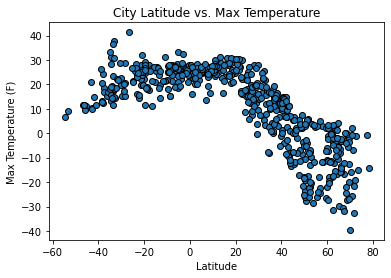

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", marker="o", )

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

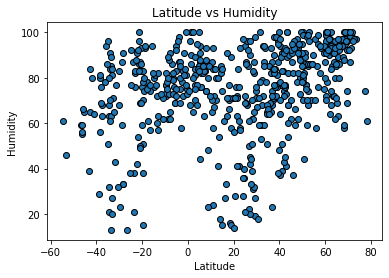

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", marker="o", )

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

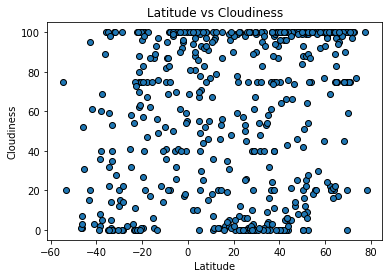

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", marker="o")


# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

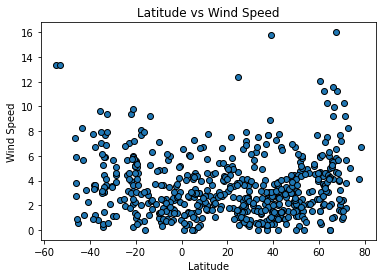

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,11.33,90,100,2.80,US,1670360054
2,kodiak,57.7900,-152.4072,2.76,82,92,5.18,US,1670360118
3,nyuksenitsa,60.4128,44.2397,-7.28,72,100,4.66,RU,1670360188
6,saskylakh,71.9167,114.0833,-21.54,98,100,3.81,RU,1670360110
8,ilulissat,69.2167,-51.1000,-1.36,97,100,2.00,GL,1670360119


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.99,76,11,7.00,PF,1670360112
4,mar del plata,-38.0023,-57.5575,24.35,76,40,6.69,AR,1670359937
5,castro,-24.7911,-50.0119,21.49,92,32,1.92,BR,1670360161
7,mozarlandia,-14.7447,-50.5706,26.14,80,87,2.85,BR,1670360189
9,atuona,-9.8000,-139.0333,25.25,77,82,7.15,PF,1670359902


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8386733250855788


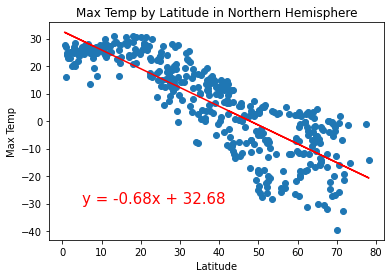

In [30]:
# Linear regression on Northern Hemisphere
north_xvalue = northern_hemi_df["Lat"]
north_yvalue = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = north_xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(north_xvalue, north_yvalue)
plt.plot(north_xvalue, regress_values, color= "r")
plt.annotate(line_eq, (5, -30), fontsize= 15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp by Latitude in Northern Hemisphere")
plt.show()

The r-value is: 0.502633490756247


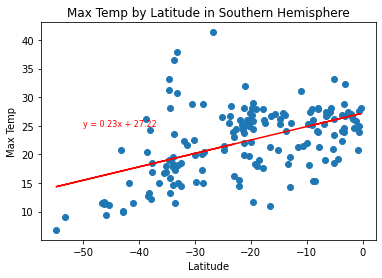

In [24]:
# Linear regression on Southern Hemisphere
south_xvalue = southern_hemi_df["Lat"]
south_yvalue = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = south_xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(south_xvalue, south_yvalue)
plt.plot(south_xvalue, regress_values, color= 'r')
plt.annotate(line_eq, (-50, 25), fontsize= 8, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp by Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

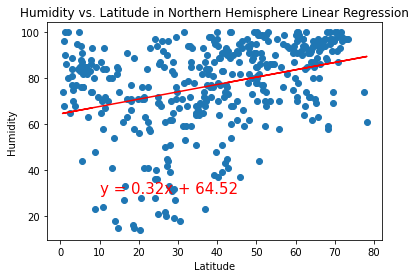

The r-value is: 0.33040628428295427


In [18]:
# Northern Hemisphere
north_xvalues = northern_hemi_df["Lat"]
north_yvalues = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_xvalues, north_yvalues)
regress_values = north_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_xvalues,north_yvalues)
plt.plot(north_xvalues, regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in Northern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

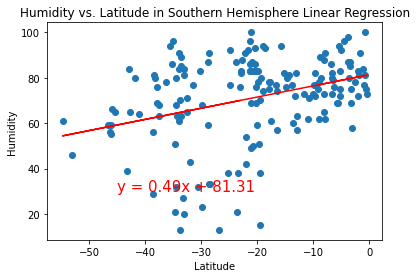

The r-value is: 0.33937365037562023


In [26]:
# Southern Hemisphere
south_xvalues = southern_hemi_df["Lat"]
south_yvalues = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_xvalues, south_yvalues)
regress_values = south_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_xvalues, south_yvalues)
plt.plot(south_xvalues,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in Southern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

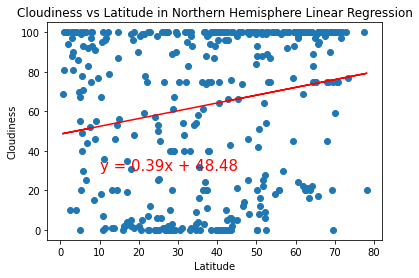

The r-value is: 0.20393479031250858


In [28]:
# Northern Hemisphere
north_xvalues = northern_hemi_df["Lat"]
north_yvalues = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_xvalues, north_yvalues)
regress_values = north_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_xvalues,north_yvalues)
plt.plot(north_xvalues,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Northern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

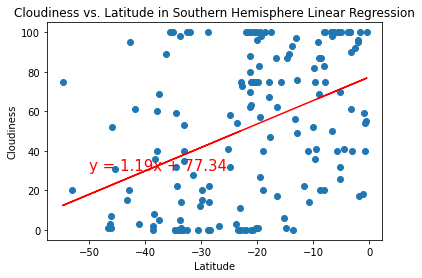

The r-value is: 0.4137461678533523


In [33]:
# Southern Hemisphere
south_xvalues = southern_hemi_df["Lat"]
south_yvalues = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_xvalues, south_yvalues)
regress_values = south_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_xvalues,south_yvalues)
plt.plot(south_xvalues,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude in Southern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

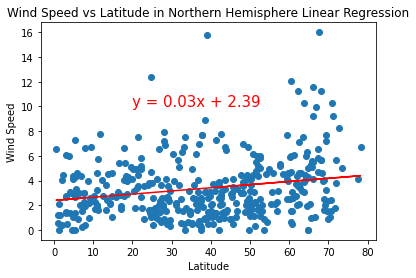

The r-value is: 0.21237838847760934


In [35]:
# Northern Hemisphere
north_xvalues = northern_hemi_df["Lat"]
north_yvalues = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_xvalues, north_yvalues)
regress_values = north_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_xvalues,north_yvalues)
plt.plot(north_xvalues,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in Northern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

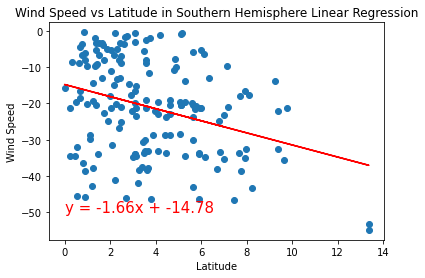

The r-value is: -0.32086982466686453


In [36]:
# Southern Hemisphere
south_xvalues = southern_hemi_df["Wind Speed"]
south_yvalues = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_xvalues, south_yvalues)
regress_values = south_xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_xvalues,south_yvalues)
plt.plot(south_xvalues,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in Southern Hemisphere Linear Regression")
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There's not much correlation in the datasets since the scatterplots show that the data is all over the place. 
# We can make an exception for Temperature vs Latitude since the North and South Hemisphere seems to have a small correlation. 
